# Cirrhosis New Competition

### 변수 설명
- ID                 : 환자 ID
- N_Days             : 등록 시작 시점부터 censored 까지 기간
- Status             : 
- Drug               : 약물 처리군 / 플라시보 군
- Age                : 연령
- Sex                : 성별
- Ascites            : Y/N 배에 복수가 찼는지
- Hepatomegaly       : Y/N 간 비대칭이 생겼는지
- Spiders            : Y/N 거미혈관증 유무 주로 여성에게 많이 발생할 수 있음 ( 에스트로겐과 관련 )
- Edema              : Y/N 부종 유무
- Bilirubin          : 적혈구 파괴 수치 (파괴 수치가 높을수록 간염이 존재할 확률이 높음)
- Cholesterol        : 콜레스테롤 상승시 지방간이 생김 ( 높을수록 간에 안좋음 )
- Albumin            : 단백질의 한 종류 (값이 하락할 수록 간 기능이 안좋음)
- Copper             : 신체의 필수 미네랄 하나 (단백질, 효소) 수치가 높을 수록 대사 장애 발생 가능성 높음
- Alk_Phos           : (alp) 수치가 높으면 간의 문제가 있을 가능성 높음
- SGOT               : (AST) 간기능 검사의 주요 요소 [0, 40]이 정상 범위
- Tryglicerides      : 중성지방 150 미만이 정상.
- Platelets          : 혈소판 수치가 떨어질 수록 간 경변이 발생 가능
- Prothrombin        : 혈액이 얼마나 빨리 굳는지 측정 시간 ( 시간이 증가하면 응고 시간이 늘어나기 때문에 간경변 의심할 수 있음, 높을수록 의심)
- Stage              : 간경변의 4단계 1부터 4까지의 순서

## 1. Setting

In [5]:
# import modules
import pandas as pd
import numpy as np
import warnings

# graph
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

%matplotlib inline

In [6]:
# 한글 깨짐 방지 및 warnings 알림 금지
plt.rc('font', family='NanumSquare')
warnings.filterwarnings(action = 'ignore')

In [7]:
# load data
train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')
submission = pd.read_csv('../Data/sample_submission.csv')

## 2. Data info

In [8]:
train.isna().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [9]:
train.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [38]:
train['Copper'].sort_values().unique()

array([  4.,   5.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,
        18.,  19.,  20.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,
        30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,
        41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,
        52.,  53.,  54.,  57.,  58.,  59.,  60.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  84.,  85.,  86.,  88.,  89.,
        90.,  91.,  94.,  95.,  96.,  97.,  98., 100., 101., 102., 103.,
       104., 105., 107., 108., 110., 111., 112., 113., 114., 115., 116.,
       121., 122., 123., 124., 129., 130., 131., 136., 138., 139., 140.,
       141., 143., 145., 148., 150., 151., 152., 154., 155., 156., 158.,
       159., 161., 172., 173., 177., 178., 180., 182., 186., 188., 190.,
       196., 199., 200., 201., 205., 207., 208., 209., 210., 217., 219.,
       220., 221., 225., 227., 228., 231., 232., 23

In [29]:
train[train['Tryglicerides'] > 200]

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
7,7,1615,Placebo,21281,F,N,Y,N,N,0.6,273.0,3.94,36.0,598.0,52.70,214.0,227.0,9.9,3.0,C
19,19,3358,Placebo,17031,F,N,N,N,N,0.6,322.0,3.77,52.0,834.0,60.45,214.0,153.0,11.0,3.0,C
62,62,980,D-penicillamine,24681,F,N,N,N,N,6.4,347.0,3.77,90.0,960.0,86.00,242.0,251.0,10.4,3.0,D
74,74,1295,Placebo,20510,F,N,N,N,N,0.9,273.0,3.97,48.0,722.0,52.70,214.0,268.0,10.0,2.0,C
97,97,1455,D-penicillamine,14812,M,N,N,Y,N,3.4,448.0,3.56,88.0,924.0,120.90,318.0,283.0,11.0,4.0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7842,7842,1810,Placebo,11462,F,N,N,N,N,3.4,372.0,3.33,94.0,1282.0,120.00,205.0,271.0,9.9,2.0,C
7846,7846,3069,Placebo,16718,F,N,N,N,N,0.6,273.0,3.65,48.0,794.0,52.70,214.0,336.0,9.6,2.0,C
7868,7868,769,Placebo,21699,F,N,Y,N,N,25.5,358.0,3.52,219.0,2468.0,201.50,205.0,261.0,11.5,4.0,D
7894,7894,935,Placebo,21699,F,N,Y,N,N,4.0,358.0,3.23,219.0,2468.0,201.50,205.0,233.0,11.5,3.0,D


In [10]:
train.dtypes

id                 int64
N_Days             int64
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
Status            object
dtype: object

In [11]:
test.isna().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [14]:
train['Status'].value_counts()

Status
C     4965
D     2665
CL     275
Name: count, dtype: int64

## 3. EDA

In [18]:
patients = train.copy().drop(columns=['id'])
features = patients.columns.tolist()
features.pop() # getting rid of the target 'Status'
target = train['Status']

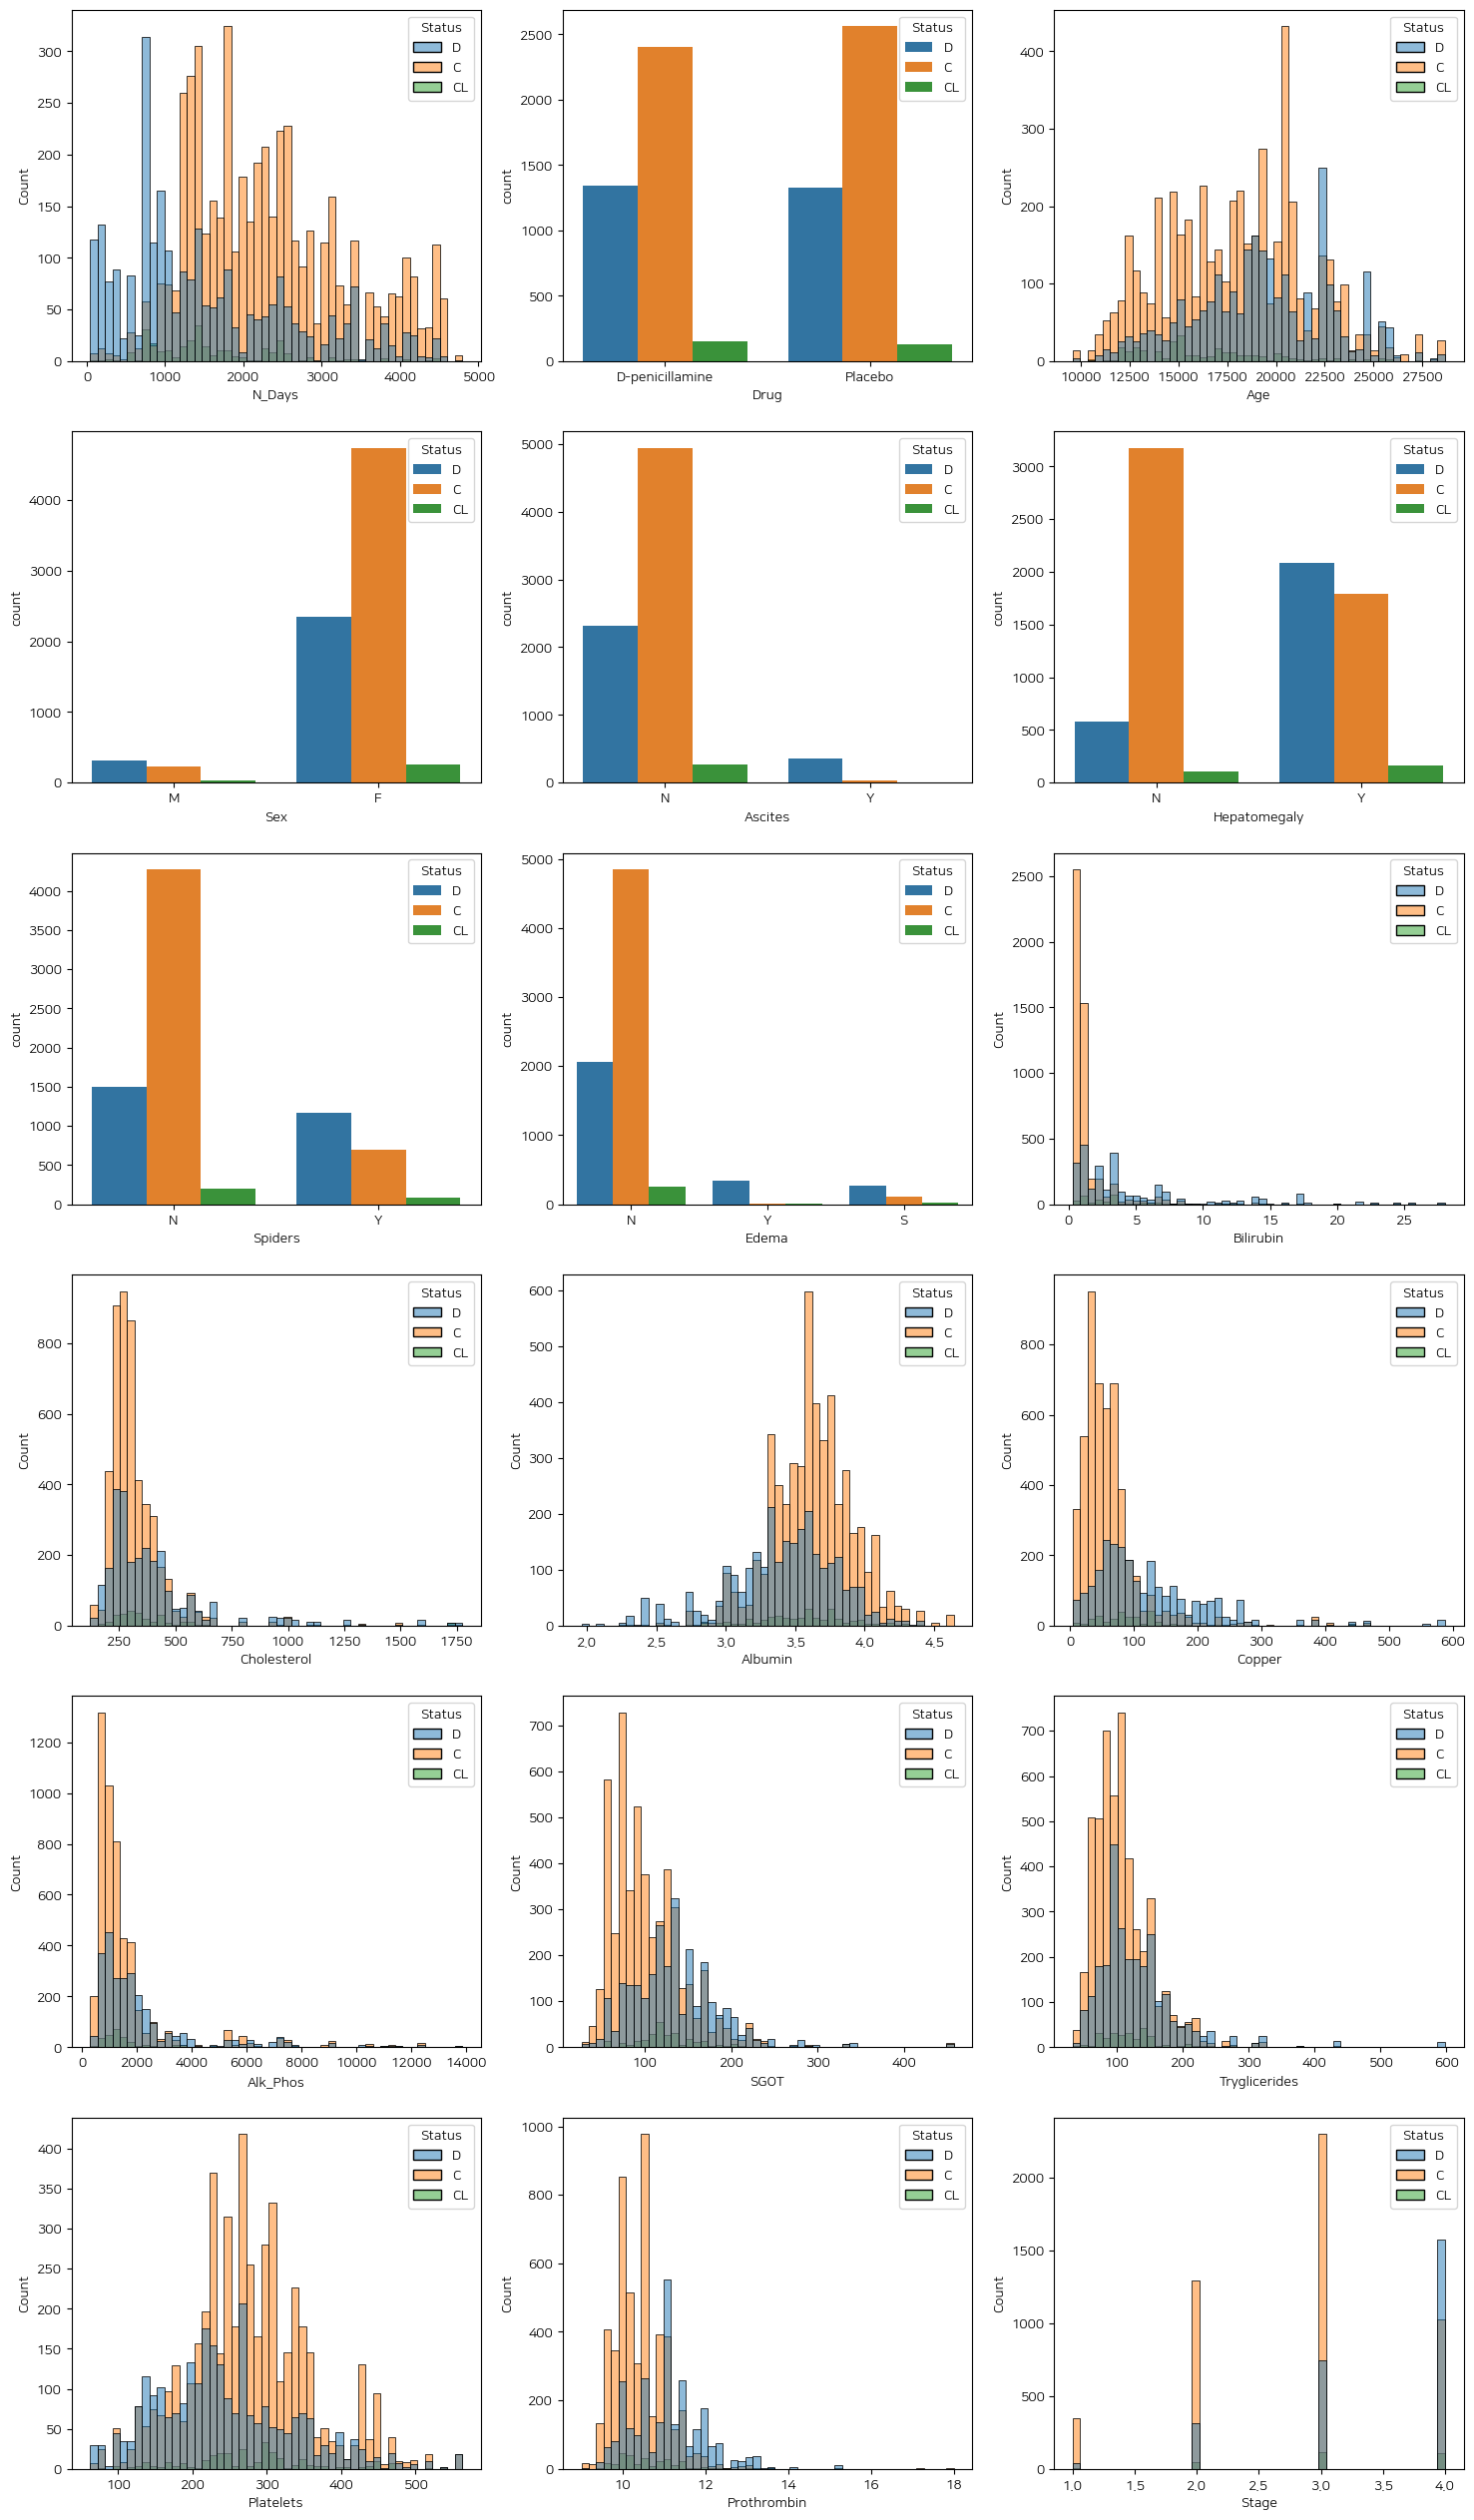

In [19]:
_, axes = plt.subplots(nrows= 6, ncols=3, figsize=(18,32))
for feat, ax in zip(features, axes.ravel()):
    if patients[feat].dtype == 'object':
        sns.countplot(data=patients, x=feat, ax=ax, hue='Status')
    else:
        sns.histplot(data=patients, x=feat, bins=50, ax=ax, hue='Status')
plt.show()

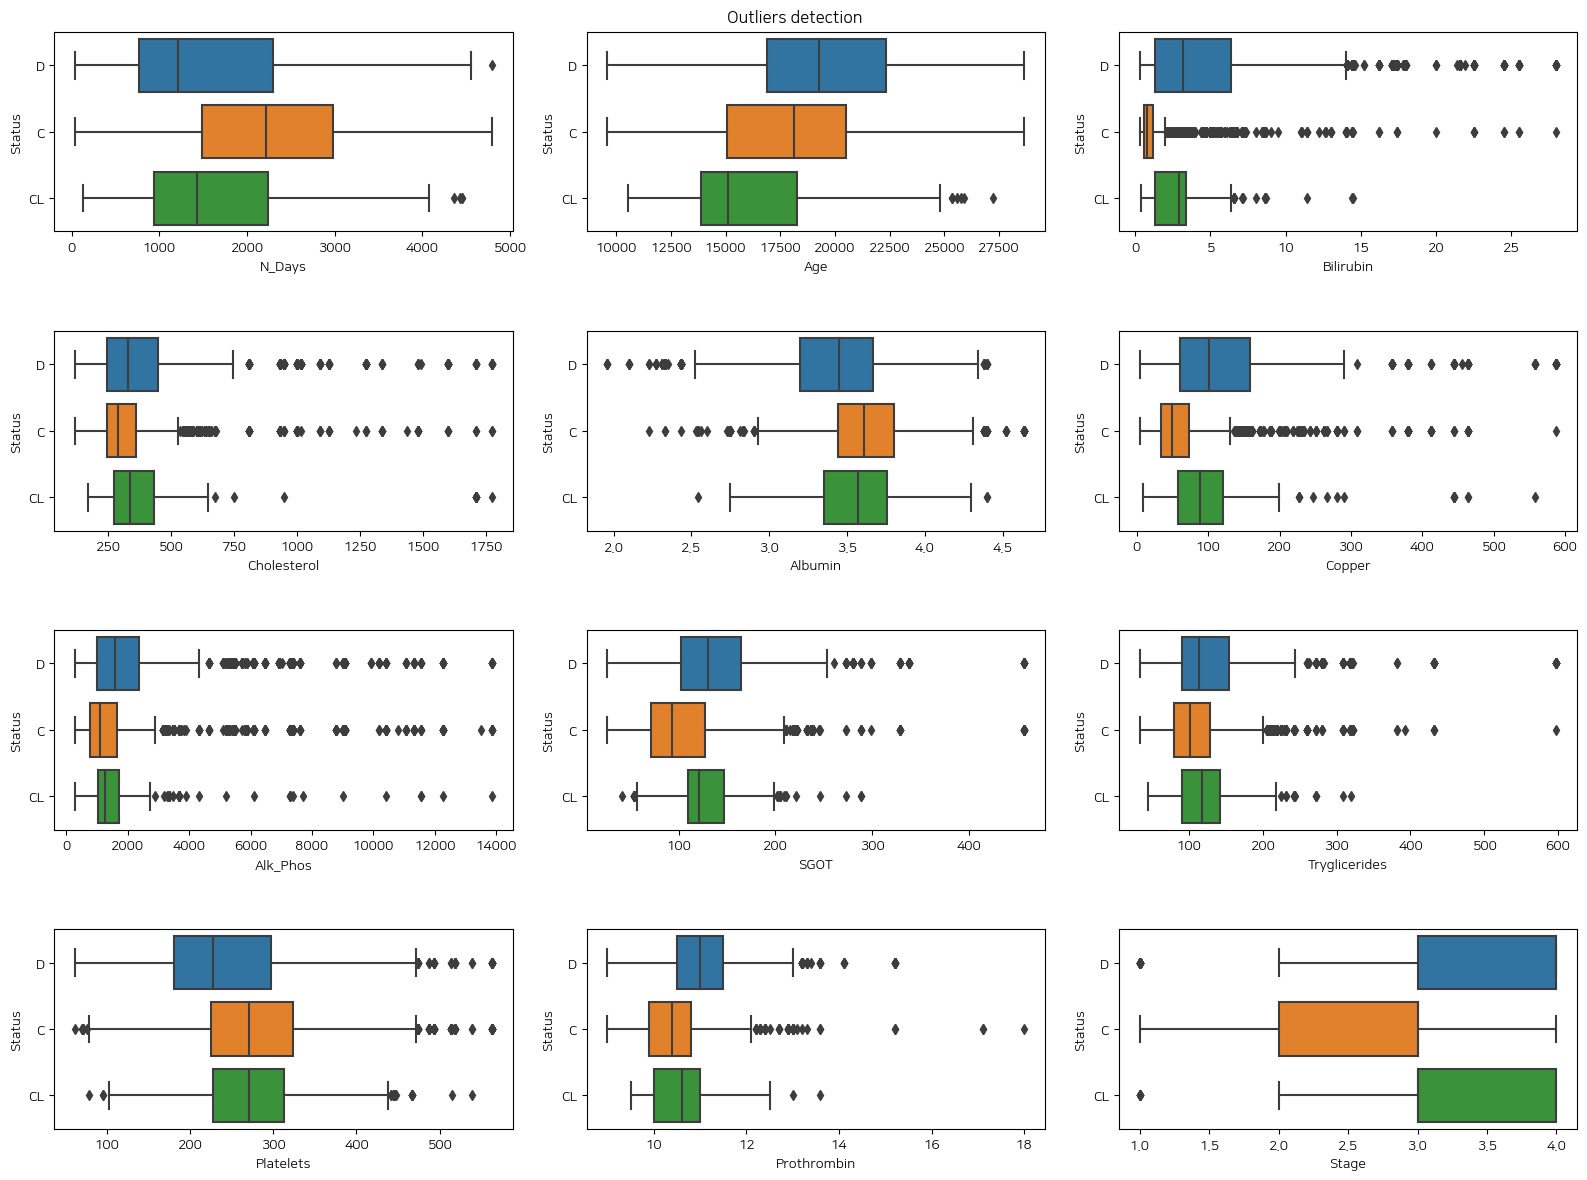

In [20]:
# I keep only the numerical feature for both outliers and heatmap
col_not_object = patients.select_dtypes(exclude='object')
patients_corr = patients[col_not_object.columns]

_, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,12))
for feat, ax in zip(patients_corr.columns, axes.ravel()):
    sns.boxplot(data=patients, x=feat, y='Status', ax=ax)
    
plt.suptitle('Outliers detection')
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

<Axes: >

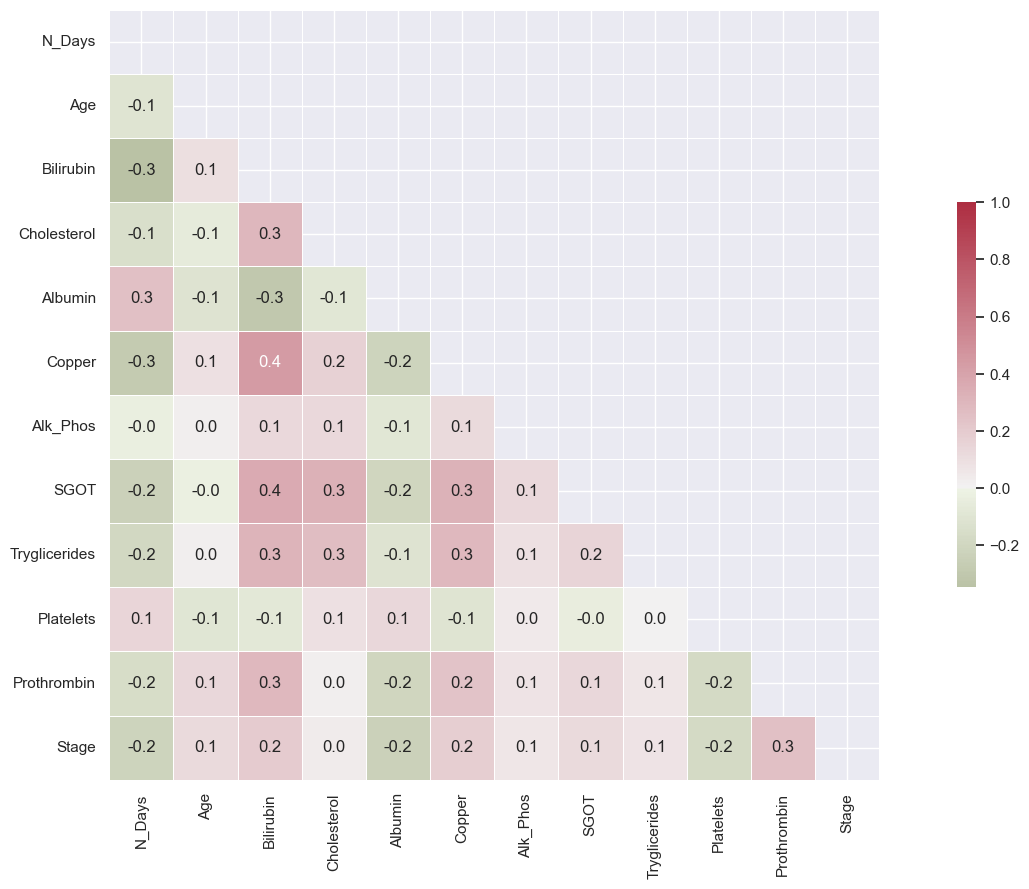

In [21]:
sns.set(rc={'figure.figsize':(20,10)})

corr = patients_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(100, 7, s = 75, l = 40, n = 20, center = 'light', as_cmap = True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={'shrink':.5}, annot=True, fmt='.1f')

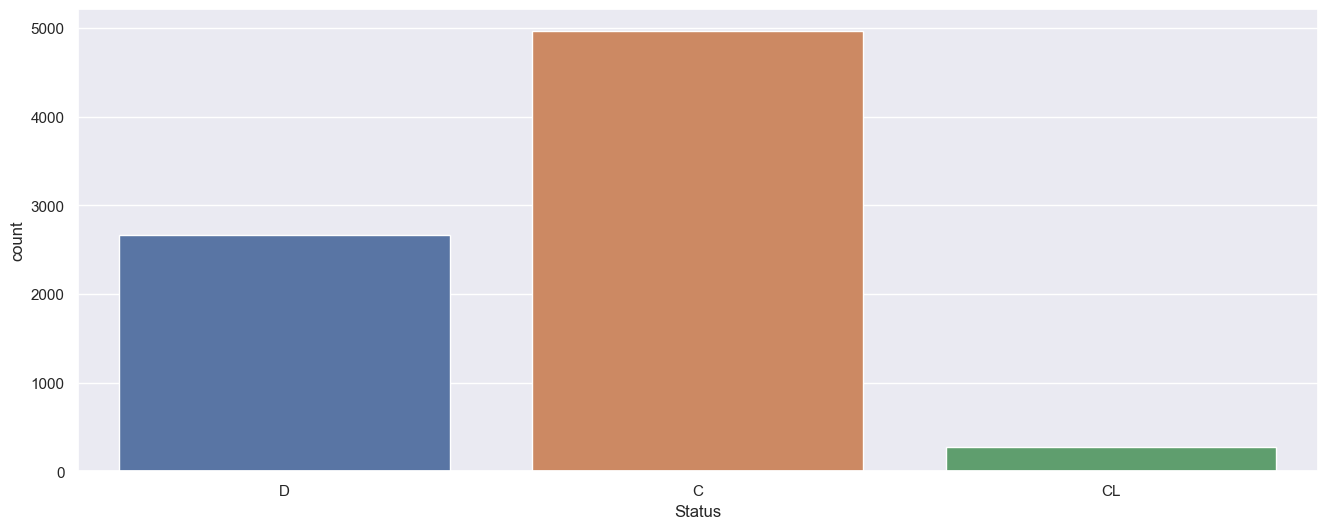

In [22]:
plt.figure(figsize=(16,6))
sns.countplot(data=patients, x='Status')
class_weight = train['Status'].value_counts(normalize=True)
class_weight = class_weight.tolist()